In [1]:
import torch 
import torch.nn as nn 
from torch.autograd import Variable 
import torch.utils.data as Data 
import torchvision 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import csv
import codecs
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:

data1 = pd.read_excel(r'2.xlsx',header=0)

In [3]:
X = data1.values[:, 3:23]
Y = data1.values[:, 1:3]


In [4]:
a = data1.values[:, 1:2]
Y2 = data1.values[:, 2:3]

In [5]:
#plt.plot(Y2, label='y2', linestyle = '-')
#plt.plot(Y1, label='Y2', linestyle = '-')
a
O=-Y1+9
O = np.array(O)
P=np.power(10,O)

NameError: name 'Y1' is not defined

In [ ]:
P

In [ ]:
a

In [6]:
Y1 = np.log10(a.astype('float'))
Y1 = -Y1+9
Y1= pd.DataFrame(Y1)
Y2  = pd.DataFrame(Y2)
Y = pd.concat([Y1, Y2], axis=1)
Y

,0,0
0,8.602060,8.60206
1,8.124939,8.12494
2,8.508638,8.50864
3,8.408935,8.40894
4,8.130768,8.13077
...,...,...
1969,6.131944,6.13194
1970,5.850781,5.85078
1971,7.721246,7.72125
1972,7.886057,7.88606


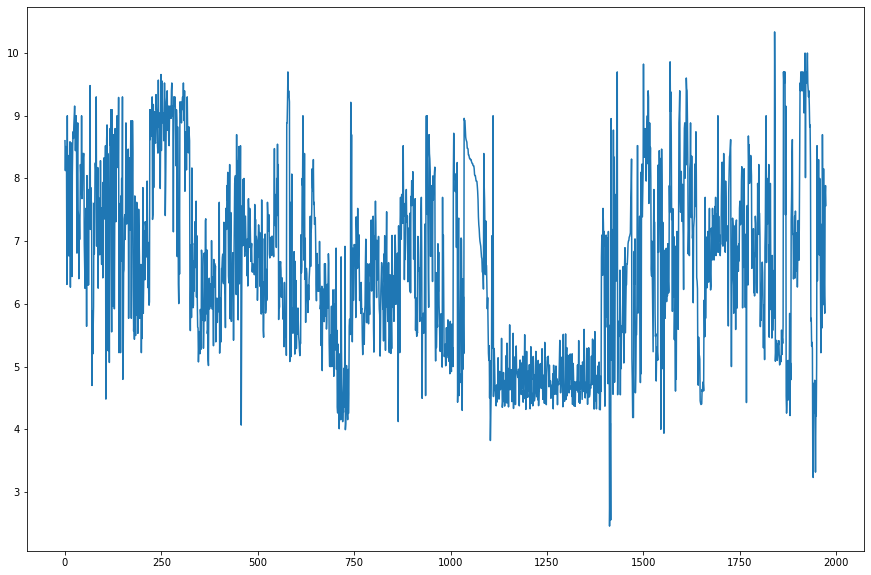

In [12]:
#plt.plot(Y1, label='Y2', linestyle = ':')
#plt.plot(a, label='Y2', linestyle = ':')
fig = plt.figure(figsize=(15, 10))
plt.plot(Y2, label='Y2', linestyle = '-')

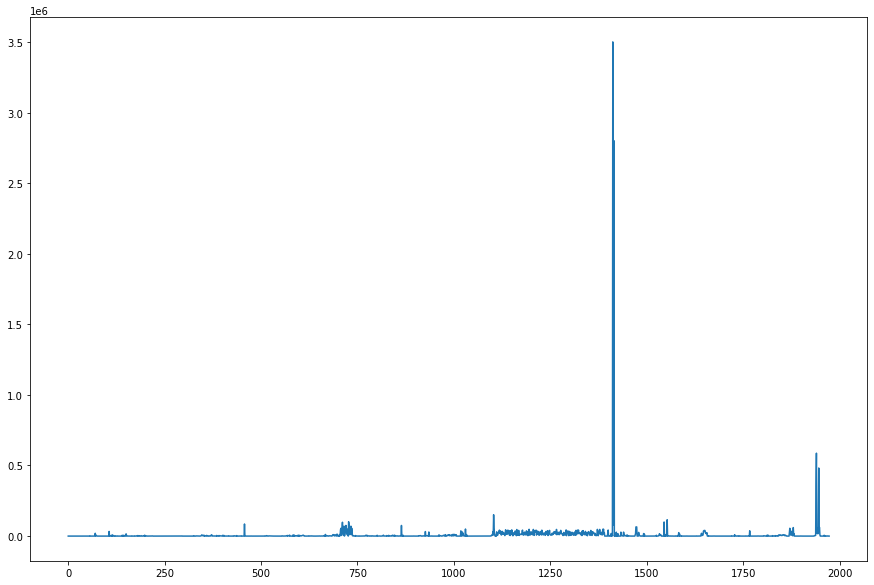

In [13]:
fig = plt.figure(figsize=(15, 10))
plt.plot(a, label='Y2', linestyle = '-')


In [54]:
def minmaxscaler(df):
    min = np.amin(df)
    max = np.amax(df)    
    return (df - min)/(max-min)

In [55]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (1,2))
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(data=scaled_features, columns=['LipoaffinityIndex','MLogP','maxHsOH','minsssN','MDEC-23','nC','maxssO',
              'minHsOH','BCUTc-1l','maxsssN','MLFER_A','minssO','SHsOH',
              'SsOH','maxsOH','ATSp5','SwHBa','C1SP2','nHBAcc','minHBint5'])
scaler.fit(Y)
scaled_features = scaler.transform(Y)
#Y = pd.DataFrame(data=scaled_features, columns=['IC50_nM','pIC50'])

In [56]:
#X_train, X_test, Y_train, Y_test = train_test_split(minmaxscaler(X), minmaxscaler(Y), test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, random_state=42)

In [57]:
x_tra = X_train.astype(float)
x_tra = torch.from_numpy(x_tra.values)
x_tra = x_tra.float()

x_tes = X_test.astype(float)
x_tes = torch.from_numpy(x_tes.values)
x_tes = x_tes.float()

y_tra = Y_train.astype(float)
y_tra = torch.from_numpy(y_tra.values)
y_tra = y_tra.float()

y_tes = Y_test.astype(float)
y_tes = torch.from_numpy(y_tes.values)
y_tes = y_tes.float()



In [58]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(20, 1000),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(1000, 800),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(800, 600),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(600, 500),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(500, 300),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(300, 250),
            torch.nn.Dropout(0.2),
            torch.nn.ReLU(),
            torch.nn.Linear(250, 2)
        )

        # init

    def forward(self, x):
        x = self.mlp(x)
        return x

In [59]:
lossData=[[]]
model = ANN()

In [551]:
loss_func = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), 0.0001)
batch_size =64
epochs = 2000
print("epoch\t loss\t")
losses = []
for i in range(epochs):
     batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
     for start in range(0, len(x_tra), batch_size):
        end = start + batch_size if start + batch_size < len(x_tra) else len(x_tra)
        xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False)
        yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False)
        predict = model(xx)
        loss =loss_func(predict, yy)
        optim.zero_grad()
        loss.backward()
        optim.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
     if i % 10==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

epoch	 loss	


<ipython-input-551-a140f8a99506>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx = torch.tensor(x_tra[start:end], dtype = torch.float, requires_grad = False)
<ipython-input-551-a140f8a99506>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  yy = torch.tensor(y_tra[start:end], dtype = torch.float, requires_grad = False)


0 0.22578062
10 0.21795169
20 0.20850033
30 0.2027167
40 0.21197158
50 0.19293752
60 0.23932128
70 0.20524895
80 0.21175638
90 0.20436487
100 0.20722914
110 0.20000704
120 0.19847368
130 0.19903666
140 0.18887779
150 0.19961657
160 0.1922389
170 0.1863978
180 0.22332975
190 0.20902677
200 0.20928738
210 0.19189039
220 0.18408886
230 0.18002464
240 0.18824455
250 0.20265663
260 0.19031791
270 0.18460013
280 0.2023365
290 0.18941593
300 0.18164289
310 0.18555255
320 0.17820734
330 0.18720606
340 0.19639212
350 0.19074057
360 0.20991576
370 0.18619637
380 0.16831528
390 0.20952749
400 0.18503675
410 0.18295263
420 0.18466614
430 0.17793688
440 0.19430453
450 0.18982033
460 0.1731163
470 0.17626587
480 0.16964608
490 0.1772125
500 0.18669032
510 0.18681067
520 0.18660836
530 0.17832518
540 0.17985548
550 0.19511579
560 0.16905224
570 0.1725419
580 0.17479433
590 0.17596279
600 0.18314913
610 0.1848728
620 0.16906875
630 0.17809282
640 0.19828635
650 0.17977875
660 0.17915848
670 0.16961098

In [553]:
test=pd.DataFrame(data=losses)
test.to_csv('./loss_ANN2.csv',encoding='gbk')

Text(0, 0.5, 'loss')

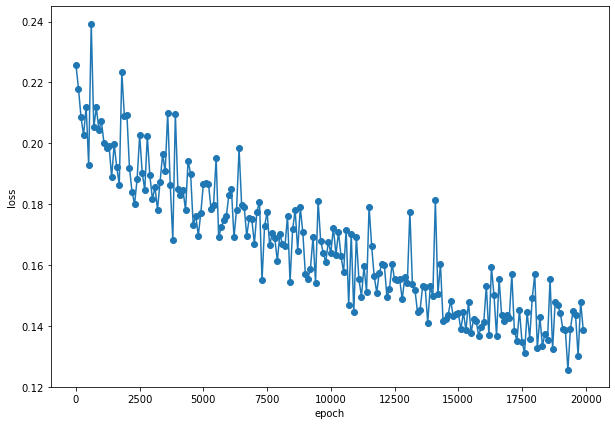

In [554]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('loss')

In [557]:
predicted = model(x_tes)

predicted = predicted.detach().numpy()

 
# 计算误差
result =abs(np.mean(predicted- Y_test))
print("The mean error of linear regression:")
print(result)

The mean error of linear regression:
0    0.017745
0    0.017593
dtype: float64


In [558]:
torch.save(model,"ANN.pth")

In [158]:
#predicted1[:,1]

In [559]:
x_tra

tensor([[1.5896, 1.5897, 1.8009,  ..., 1.0500, 1.0303, 1.3999],
        [1.6331, 1.5128, 1.0000,  ..., 1.0500, 1.0606, 1.0939],
        [1.3951, 1.1795, 1.0000,  ..., 1.0000, 1.0455, 1.0939],
        ...,
        [1.3957, 1.4359, 1.6675,  ..., 1.0000, 1.0152, 1.0939],
        [1.4354, 1.3846, 1.6537,  ..., 1.0000, 1.0000, 1.0939],
        [1.3947, 1.3590, 1.0000,  ..., 1.1000, 1.0758, 1.0939]])

In [560]:
#import random
#slice = random.sample(x_tes.numpy().tolist(), 150)


In [561]:
#slice = torch.Tensor(slice)

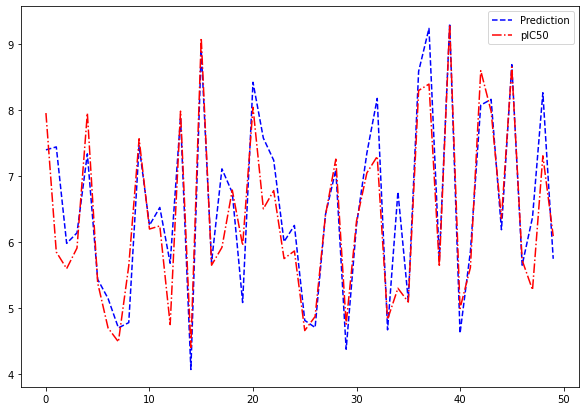

In [564]:
predicted1 = model(x_tes[0:50,:])

predicted1 = predicted1.detach().numpy()

fig, ax = plt.subplots(figsize = (10, 7))
#plt.scatter(x_ver[: ,2],predicted1)
#plt.scatter(x_ver[: ,2],y_ver)

ax.plot(predicted1[:,1],color="blue", label='Prediction', linestyle = '--')
ax.plot(y_tes[0:50,1], color="red",label='pIC50', linestyle = '-.')
#ax.plot(y_ver, label='Y2', linestyle = '-')
ax.legend()
#ax.set_xlabel('f')
#ax.set_ylabel('s11')
#print(predicted1)

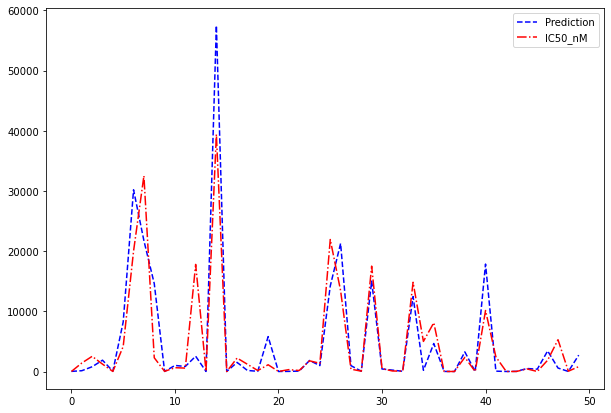

In [742]:
predicted2 = model(x_tes[0:50,:])
predicted2 = predicted2.detach().numpy()
#y_tes1= np.exp(-y_tes[0:50,0]+9)
r=-y_tes[0:50,0]+9
r = np.array(r)
y_tes1=np.power(10,r)
u = -predicted2[:,0]+9
u = np.array(u)
predicted3 = np.power(10,u)
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(predicted3,color="blue", label='Prediction', linestyle = '--')
ax.plot(y_tes1, color="red",label='IC50_nM', linestyle = '-.')
#ax.plot(y_ver, label='Y2', linestyle = '-')
ax.legend()

In [656]:
df = pd.read_csv(r"2_test_20 feature.csv")

In [657]:
T = df.values[:, 1:21]
T.shape

(50, 20)

In [658]:
T = minmaxscaler(T)
T = T.astype(float)
T = torch.from_numpy(T)
T = T.float()

In [659]:
predicted4 = model(T)


In [660]:
predicted4 = predicted4.detach().numpy()

In [661]:
c=predicted4[:,1]
c

array([5.2313232, 5.199647 , 4.9398637, 5.259994 , 4.849398 , 5.631479 ,
       4.407215 , 4.8729653, 5.432119 , 5.223732 , 4.855544 , 4.9792366,
       4.542212 , 5.1840844, 4.655321 , 5.0742183, 5.1096406, 5.204479 ,
       4.8320675, 5.550359 , 5.173207 , 4.998423 , 5.076184 , 5.4685154,
       5.170187 , 4.7133565, 5.217375 , 5.126226 , 4.931354 , 5.0986958,
       4.906422 , 5.437214 , 4.9636984, 5.119158 , 5.0605965, 5.522114 ,
       5.1257796, 5.0204062, 6.1387587, 7.0713744, 5.4329376, 5.4489465,
       5.6810026, 7.25457  , 6.0720453, 4.8635054, 4.8533926, 5.4242287,
       4.6909475, 5.1832933], dtype=float32)

In [663]:
np.savetxt("PIC50.csv",c)

In [664]:
predicted4[:,0]

array([5.232395 , 5.1999855, 4.940475 , 5.2604876, 4.850724 , 5.6316757,
       4.4078016, 4.875457 , 5.4322944, 5.224413 , 4.8570523, 4.980174 ,
       4.5435934, 5.185091 , 4.6567283, 5.075247 , 5.1107283, 5.204751 ,
       4.8333206, 5.5500975, 5.1724186, 4.9991226, 5.0779486, 5.4693046,
       5.1677365, 4.7141814, 5.218071 , 5.126325 , 4.9326124, 5.101366 ,
       4.906515 , 5.438102 , 4.965152 , 5.1199446, 5.059503 , 5.522935 ,
       5.126449 , 5.0213203, 6.139516 , 7.0718517, 5.433367 , 5.449881 ,
       5.6818924, 7.2546854, 6.072921 , 4.864358 , 4.8550043, 5.4250803,
       4.6919394, 5.183914 ], dtype=float32)

In [665]:
i = -predicted4[:,0]+9
i = np.array(i)
predicted5 = np.power(10,i)

In [666]:
d = predicted5 
d

array([ 5856.051  ,  6309.784  , 11468.985  ,  5489.2427 , 14101.84   ,
        2335.2012 , 39101.945  , 13321.195  ,  3695.776  ,  5964.679  ,
       13897.852  , 10467.09   , 28602.672  ,  6529.937  , 22043.053  ,
        8409.171  ,  7749.4653 ,  6240.9253 , 14678.423  ,  2817.7505 ,
        6723.283  , 10020.223  ,  8357.02   ,  3393.8718 ,  6796.158  ,
       19311.613  ,  6052.4194 ,  7476.096  , 11678.514  ,  7918.3364 ,
       12401.805  ,  3646.6848 , 10835.481  ,  7586.744  ,  8719.607  ,
        2999.612  ,  7473.962  ,  9520.937  ,   725.24396,    84.75167,
        3686.6611 ,  3549.1057 ,  2080.2122 ,    55.63071,   845.433  ,
       13666.02   , 13963.545  ,  3757.6792 , 20326.408  ,  6547.6553 ],
      dtype=float32)

In [667]:
np.savetxt("IC50.csv",d)